In [1]:
import torch
import torchvision

mnist_train = torchvision.datasets.FashionMNIST(
    root="/22961", train=True, download=True)

100%|██████████| 26.4M/26.4M [00:01<00:00, 23.8MB/s]


Extracting /22961\FashionMNIST\raw\train-images-idx3-ubyte.gz to /22961\FashionMNIST\raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 423kB/s]


Extracting /22961\FashionMNIST\raw\train-labels-idx1-ubyte.gz to /22961\FashionMNIST\raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 4.86MB/s]


Extracting /22961\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to /22961\FashionMNIST\raw



100%|██████████| 5.15k/5.15k [00:00<?, ?B/s]

Extracting /22961\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to /22961\FashionMNIST\raw



In [2]:
print(len(mnist_train))
mnist_train.classes


60000


['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [3]:
A = mnist_train[0]
print(type(A), len(A), A[0], A[1], mnist_train.classes[A[1]], sep='\n')


<class 'tuple'>
2
<PIL.Image.Image image mode=L size=28x28 at 0x1B38286B310>
9
Ankle boot


In [4]:
convert = torchvision.transforms.PILToTensor()
img = convert(A[0])
print(type(img), img.size(), sep='\n')

<class 'torch.Tensor'>
torch.Size([1, 28, 28])


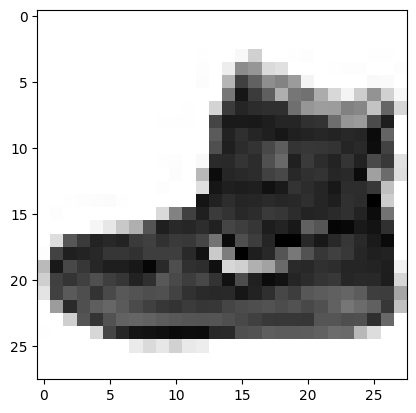

In [5]:
import matplotlib.pyplot as plt
plt.imshow(torch.squeeze(img),cmap='Greys');

In [6]:
from torch.utils.data import DataLoader
train_data_transformed = torchvision.datasets.FashionMNIST(
    root="/22961", train=True, download=False,
    transform=torchvision.transforms.PILToTensor()
)
train_dataloader = DataLoader(train_data_transformed, batch_size=4)

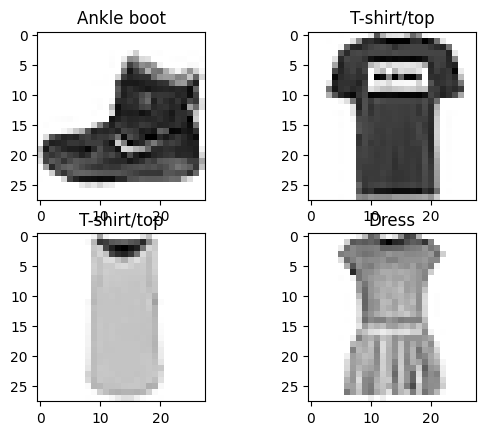

In [8]:
iterator = iter(train_dataloader)
imgs, labels = next(iterator)
class_names = train_data_transformed.classes
fig = plt.figure()
for i in range(4):
 ax = fig.add_subplot(2, 2, i+1)
 plt.imshow(torch.squeeze(imgs[i]), cmap='Greys')
 ax.set_title(class_names[labels[i]])
 #ax.axes.get_xaxis().set_visible(False)
 #ax.axes.get_yaxis().set_visible(False)
